# API Data Wrangling with Open-Meteo

In this exercise, we will:

- Fetch historical weather data using the **Open-Meteo API**.
- Parse and clean the data using **pandas**.
- Perform exploratory data analysis.
- Visualize weather trends.

In [27]:
# Install required packages if not already installed
# !pip install requests pandas matplotlib --quiet

In [28]:
# Import Libraries
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt

# Optional: Configure matplotlib for inline display in Jupyter
%matplotlib inline

## Understand the Open-Meteo API

- **API Endpoint**: `https://archive-api.open-meteo.com/v1/archive`
- **Parameters**:
  - `latitude`: Latitude of the location.
  - `longitude`: Longitude of the location.
  - `start_date`: Start date of the data (YYYY-MM-DD).
  - `end_date`: End date of the data (YYYY-MM-DD).
  - `hourly`: Comma-separated list of variables (e.g., temperature, precipitation).
  - `timezone`: Timezone of the data.

**Documentation**: [Open-Meteo API Docs](https://open-meteo.com/en/docs)

In [29]:
# Step 1: Set Up Parameters

# Location coordinates for New York City
latitude = 40.7128
longitude = -74.0060

# Date range
start_date = '2023-01-01'
end_date = '2023-01-07'  # One week of data

# Variables to fetch
hourly_variables = ['temperature_2m', 'relativehumidity_2m', 'precipitation']


In [30]:
# Step 2: Make the API Request

base_url = 'https://archive-api.open-meteo.com/v1/archive'

params = {
    'latitude': latitude,
    'longitude': longitude,
    'start_date': start_date,
    'end_date': end_date,
    'hourly': ','.join(hourly_variables),
    'timezone': 'America/New_York'
}

response = requests.get(base_url, params=params)


In [31]:
# Check if the request was successful

if response.status_code == 200:
    print('Data fetched successfully!')
else:
    print(f'Failed to fetch data. Status code: {response.status_code}')


Data fetched successfully!


In [32]:
# Step 3: Load Data into pandas DataFrame

data = response.json()
hourly_data = data['hourly']

df = pd.DataFrame(hourly_data)
df.head()


,time,temperature_2m,relativehumidity_2m,precipitation
0,2023-01-01T00:00,10.7,99,1.0
1,2023-01-01T01:00,10.5,99,1.0
2,2023-01-01T02:00,10.4,98,0.1
3,2023-01-01T03:00,10.3,96,0.0
4,2023-01-01T04:00,9.7,95,0.0


In [33]:
# Step 4: Data Cleaning

# Convert 'time' column to datetime
df['time'] = pd.to_datetime(df['time'])

# Set 'time' as the index
df.set_index('time', inplace=True)

# Check for missing values
df.isnull().sum()


temperature_2m         0
relativehumidity_2m    0
precipitation          0
dtype: int64

In [34]:
# Handle missing values (if any)
#df.fillna(method='ffill', inplace=True)  # Forward fill DEPRECATED 
df.ffill(inplace=True)  # Forward fill


In [35]:
# Step 5: Exploratory Data Analysis

# Summary Statistics
df.describe()

,temperature_2m,relativehumidity_2m,precipitation
count,168.000000,168.000000,168.000000
mean,8.371429,86.422619,0.142857
std,3.495063,12.799933,0.436037
min,0.400000,45.000000,0.000000
25%,5.900000,81.000000,0.000000
50%,8.250000,90.500000,0.000000
75%,11.100000,97.000000,0.000000
max,17.900000,100.000000,3.100000


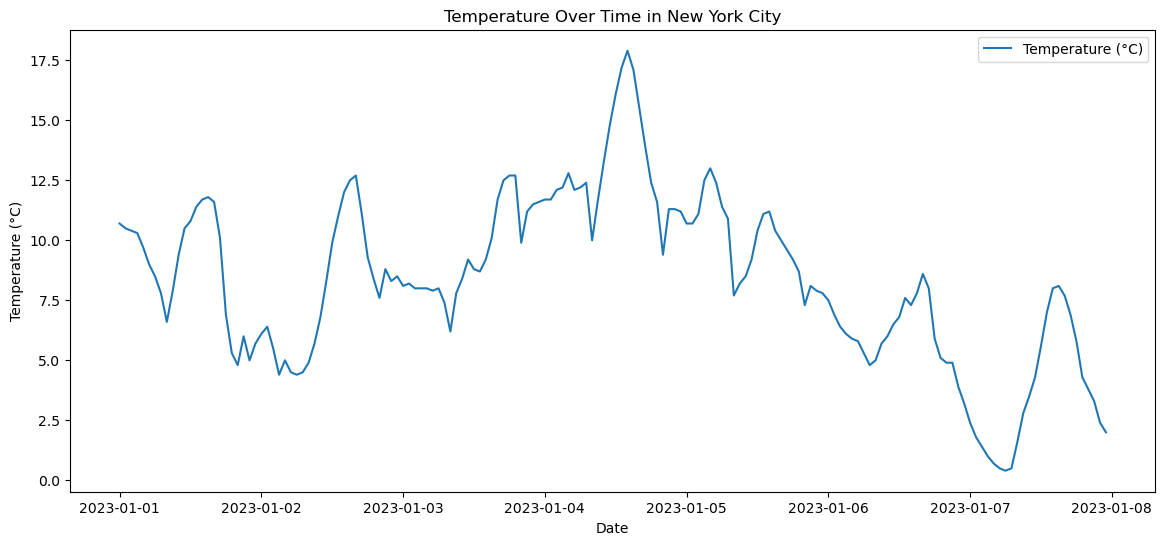

In [36]:
# Plot Temperature Over Time

plt.figure(figsize=(14, 6))
plt.plot(df.index, df['temperature_2m'], label='Temperature (°C)')
plt.title('Temperature Over Time in New York City')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

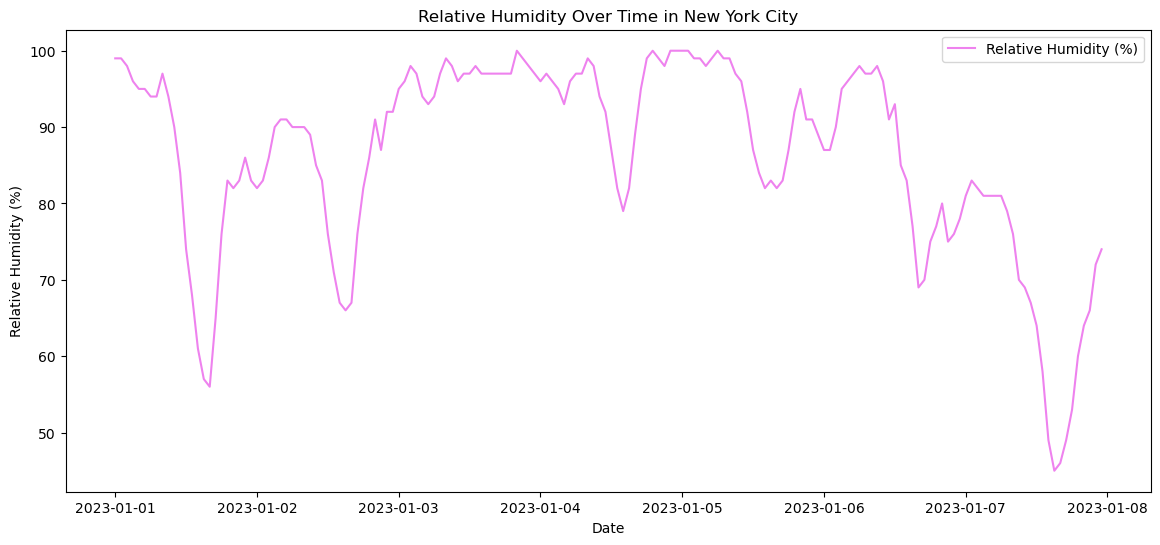

In [37]:
# Plot Relative Humidity Over Time

plt.figure(figsize=(14, 6))
plt.plot(df.index, df['relativehumidity_2m'], color='violet', label='Relative Humidity (%)')
plt.title('Relative Humidity Over Time in New York City')
plt.xlabel('Date')
plt.ylabel('Relative Humidity (%)')
plt.legend()
plt.show()


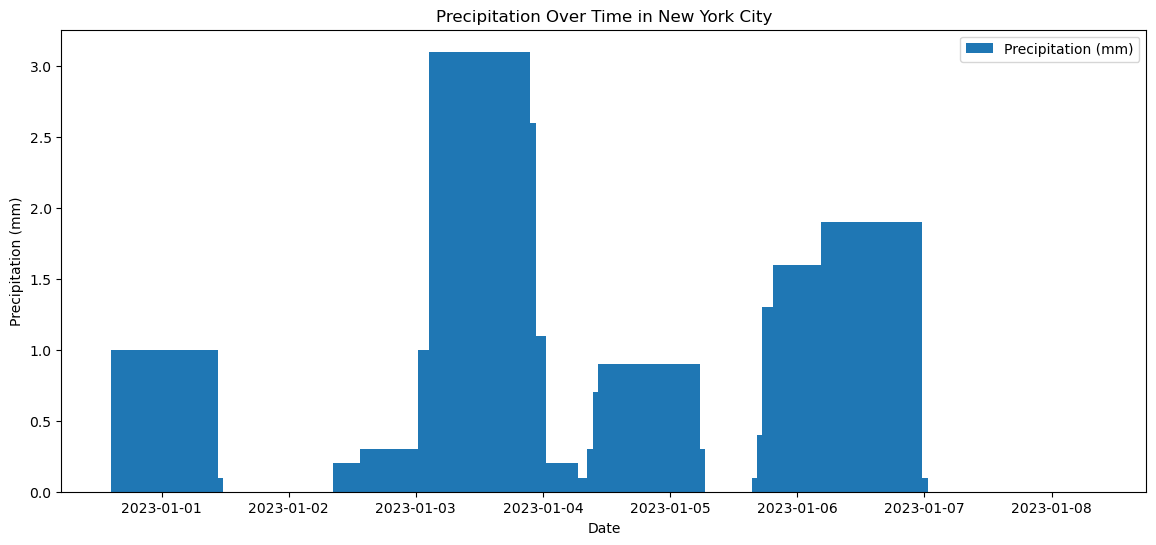

In [38]:
# Plot Precipitation Over Time

plt.figure(figsize=(14, 6))
plt.bar(df.index, df['precipitation'], label='Precipitation (mm)')
plt.title('Precipitation Over Time in New York City')
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.legend()
plt.show()


In [39]:
# Step 6: Correlation Analysis

# Calculate correlation between temperature and humidity
correlation = df['temperature_2m'].corr(df['relativehumidity_2m'])
print(f'Correlation between Temperature and Relative Humidity: {correlation:.2f}')


Correlation between Temperature and Relative Humidity: 0.24


                     temperature_2m  relativehumidity_2m  precipitation  \
time                                                                      
2023-01-01 00:00:00            10.7                   99            1.0   
2023-01-01 01:00:00            10.5                   99            1.0   
2023-01-01 02:00:00            10.4                   98            0.1   
2023-01-01 03:00:00            10.3                   96            0.0   
2023-01-01 04:00:00             9.7                   95            0.0   
2023-01-01 05:00:00             9.0                   95            0.0   
2023-01-01 06:00:00             8.5                   94            0.0   
2023-01-01 07:00:00             7.8                   94            0.0   

                     raininess  
time                            
2023-01-01 00:00:00   3.674235  
2023-01-01 01:00:00   3.674235  
2023-01-01 02:00:00   1.161895  
2023-01-01 03:00:00   0.000000  
2023-01-01 04:00:00   0.000000  
2023-01-01 05:00:0

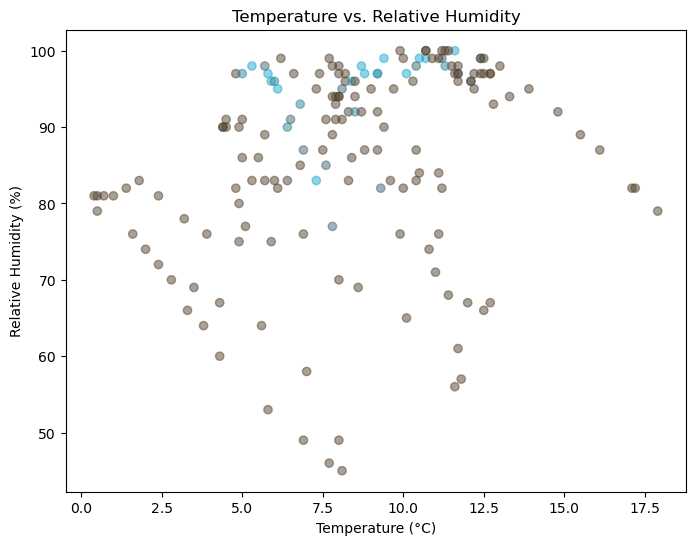

In [40]:
# EXPEIRMENTAL
# Scatter Plot of Temperature vs. Relative Humidity

plt.figure(figsize=(8, 6))

#precip = np.array(df['precipitation']).astype(np.int32)
#raininess = np.maximum(precip, 3).astype(np.int32) 

rainy_colors = ['#554430', '#446677', '#338899', '#22AACC']

df['raininess']   = df['precipitation'].apply(lambda p: sqrt(13.5*p) )
raincolor = df['raininess'].apply(lambda r: rainy_colors[ min(int(r),3)])
print(df.head(8))
print(df.describe())
    
plt.scatter(df['temperature_2m'], df['relativehumidity_2m'], alpha=0.5, c=raincolor)
plt.title('Temperature vs. Relative Humidity')
plt.xlabel('Temperature (°C)')
plt.ylabel('Relative Humidity (%)')
plt.show()


In [41]:
# df=df.drop(columns=['raincolor'])

In [42]:
df.tail()

,temperature_2m,relativehumidity_2m,precipitation,raininess
time,,,,
2023-01-07 19:00:00,4.3,60,0.0,0.0
2023-01-07 20:00:00,3.8,64,0.0,0.0
2023-01-07 21:00:00,3.3,66,0.0,0.0
2023-01-07 22:00:00,2.4,72,0.0,0.0
2023-01-07 23:00:00,2.0,74,0.0,0.0


In [43]:
# Step 7: Resample Data to Daily Averages

daily_avg = df.resample('D').mean()
daily_avg.head()


,temperature_2m,relativehumidity_2m,precipitation,raininess
time,,,,
2023-01-01,8.850000,83.708333,0.087500,0.354599
2023-01-02,7.775000,83.458333,0.020833,0.152318
2023-01-03,9.408333,96.875000,0.395833,1.236963
2023-01-04,12.995833,94.166667,0.095833,0.489441
2023-01-05,9.916667,92.666667,0.000000,0.000000


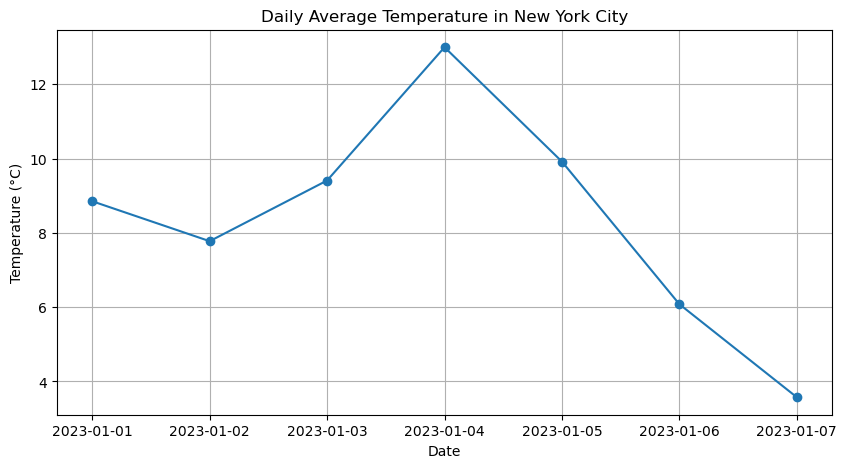

In [44]:
# Plot Daily Average Temperature

plt.figure(figsize=(10, 5))
plt.plot(daily_avg.index, daily_avg['temperature_2m'], marker='o')
plt.title('Daily Average Temperature in New York City')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()


In [45]:
# Step 8: Compare with Another Location (Los Angeles)

# Coordinates for Los Angeles
latitude_la = 34.0522
longitude_la = -118.2437

params_la = {
    'latitude': latitude_la,
    'longitude': longitude_la,
    'start_date': start_date,
    'end_date': end_date,
    'hourly': ','.join(hourly_variables),
    'timezone': 'America/Los_Angeles'
}

response_la = requests.get(base_url, params=params_la)

# Load and clean Los Angeles data
data_la = response_la.json()
hourly_data_la = data_la['hourly']
df_la = pd.DataFrame(hourly_data_la)

df_la['time'] = pd.to_datetime(df_la['time'])
df_la.set_index('time', inplace=True)
df_la.ffill(inplace=True)


In [46]:
# Resample Los Angeles Data to Daily Averages

daily_avg_la = df_la.resample('D').mean()


In [47]:
# Combine DataFrames for Comparison

combined_temp = pd.DataFrame({
    'New York': daily_avg['temperature_2m'],
    'Los Angeles': daily_avg_la['temperature_2m']
})
combined_temp.head()

,New York,Los Angeles
time,,
2023-01-01,8.850000,12.433333
2023-01-02,7.775000,9.483333
2023-01-03,9.408333,11.808333
2023-01-04,12.995833,13.766667
2023-01-05,9.916667,12.183333


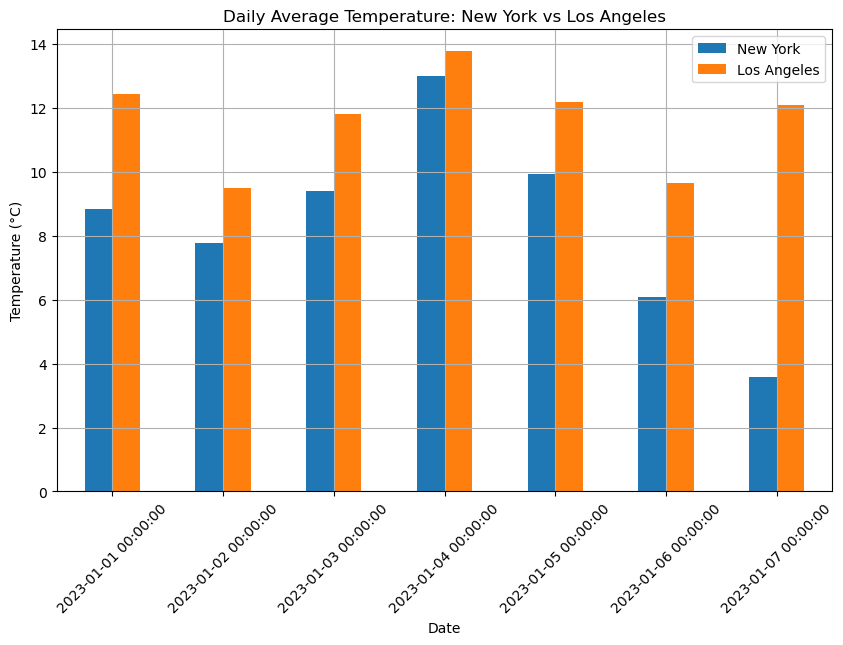

In [48]:
# Plot Comparison of Daily Average Temperature

combined_temp.plot(kind='bar', figsize=(10, 6))
plt.title('Daily Average Temperature: New York vs Los Angeles')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [49]:
# Step 9: Advanced Analysis - Temperature Difference

# Calculate Temperature Difference
combined_temp['Temp Difference'] = combined_temp['Los Angeles'] - combined_temp['New York']
combined_temp


,New York,Los Angeles,Temp Difference
time,,,
2023-01-01,8.850000,12.433333,3.583333
2023-01-02,7.775000,9.483333,1.708333
2023-01-03,9.408333,11.808333,2.400000
2023-01-04,12.995833,13.766667,0.770833
2023-01-05,9.916667,12.183333,2.266667
2023-01-06,6.079167,9.662500,3.583333
2023-01-07,3.575000,12.095833,8.520833


In [50]:
# Step 10: Save Data to CSV (Optional)

# Save New York data
df.to_csv('new_york_weather.csv')

# Save Los Angeles data
df_la.to_csv('los_angeles_weather.csv')


## Conclusion

In this exercise, we:

- Accessed and retrieved data from the **Open-Meteo API**.
- Cleaned and preprocessed JSON data using **pandas**.
- Performed exploratory data analysis and visualization.
- Compared weather patterns between **New York City** and **Los Angeles**.

---

**Next Steps**:

- **Extend the Date Range**: Analyze seasonal trends by fetching data over several months.
- **Fetch Additional Variables**: Include wind speed, atmospheric pressure, or other interesting variables.
- **Forecasting**: Use statistical methods or machine learning models to forecast future weather patterns.
- **Global Analysis**: Compare data from other global cities to gain broader insights.


## Exercises for Students

Now it's your turn! Below are some exercises to reinforce what you've learned. Try to complete them without looking at the solutions.

### Exercise: Compare Rainfall Between London and Seattle

- **Objective**: Compare the total weekly rainfall between London and Seattle over a full year.
- **Tasks**:
  1. **Fetch Data**: Retrieve hourly precipitation data for London and Seattle for the year 2022.
     - **London Coordinates**: Latitude `51.5074`, Longitude `-0.1278`
     - **Seattle Coordinates**: Latitude `47.6062`, Longitude `-122.3321`
  2. **Data Cleaning**: Convert the time columns to datetime objects and set them as the index. Handle any missing values.
  3. **Resample Data**: Resample the hourly data to weekly totals.
  4. **Visualization**: Plot the weekly total precipitation for both cities on the same graph.
  5. **Analysis**: Determine which city had more rainfall overall and identify any interesting patterns.

**Note**: Remember to handle any API limitations, such as data availability or rate limits, and to be mindful of the size of the data you're requesting.

### Tips:

- **API Parameters**: Make sure to adjust the parameters like `latitude`, `longitude`, `start_date`, `end_date`, `hourly`, and `timezone` as needed.
- **Error Handling**: Always check if your API requests are successful before proceeding.
- **Data Storage**: Consider saving your DataFrames to CSV files for future analysis.
- **Visualization**: Customize your plots with titles, labels, legends, and gridlines for better readability.

Happy coding!


In [51]:
# Locations and times for our two cities, London and Seattle - these are the knobs to turn for choosing desired data

latitude_seattle  =   47.6062
longitude_seattle = -122.3321

latitude_london  = 51.5074
longitude_london = -0.1278

start_date_2022 = '2022-01-01'
end_date_2022  = '2022-12-31'


In [52]:
# Fetch the London weather data
# use same base_url used at start of notebook

params = {
    'latitude':  latitude_london,
    'longitude': longitude_london,
    'start_date': start_date_2022,
    'end_date': end_date_2022,
    'timezone':  'Europe/London',
    'hourly':  ','.join(hourly_variables)     # keep same as in part 1 of this notebook, for NY & LA
}

london_response = requests.get(base_url, params=params)

if london_response.status_code == 200:
    print("London data received :)")
else:
    print(f"Failed to receive data for London:  {response.status_code}")
    print(london_response.json())

London data received :)


In [53]:
# Fetch the Seattle weather data

params['latitude'] = latitude_seattle
params['longitude'] = longitude_seattle
params['timezone']  = 'America/Los_Angeles'

seattle_response  = requests.get(base_url, params=params)

if seattle_response.status_code == 200:
    print("Seattle data received :)")
else:
    print(f"Failed to receive data for Seattle:  {response.status_code}")
    print(london_response.json())

Seattle data received :)


In [54]:
data1 = london_response.json()
london_df = pd.DataFrame(data1['hourly'])

data2 = seattle_response.json()
seattle_df = pd.DataFrame(data2['hourly'])

print(london_df.head())
print(seattle_df.head())

               time  temperature_2m  relativehumidity_2m  precipitation
0  2022-01-01T00:00            12.7                   91            0.0
1  2022-01-01T01:00            12.7                   93            0.0
2  2022-01-01T02:00            12.8                   93            0.0
3  2022-01-01T03:00            12.5                   93            0.0
4  2022-01-01T04:00            12.3                   92            0.0
               time  temperature_2m  relativehumidity_2m  precipitation
0  2022-01-01T00:00            -6.3                   77            0.0
1  2022-01-01T01:00            -6.4                   76            0.0
2  2022-01-01T02:00            -8.3                   82            0.0
3  2022-01-01T03:00            -8.1                   82            0.0
4  2022-01-01T04:00            -7.9                   81            0.0


In [55]:
london_df.describe()


,temperature_2m,relativehumidity_2m,precipitation
count,8760.000000,8760.000000,8760.000000
mean,12.013082,76.635388,0.075662
std,6.651766,16.722080,0.404500
min,-5.400000,17.000000,0.000000
25%,7.400000,65.000000,0.000000
50%,11.900000,81.000000,0.000000
75%,16.400000,90.000000,0.000000
max,38.000000,100.000000,14.700000


In [56]:
london_df.columns

Index(['time', 'temperature_2m', 'relativehumidity_2m', 'precipitation'], dtype='object')

In [57]:
london_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   time                 8760 non-null   object 
 1   temperature_2m       8760 non-null   float64
 2   relativehumidity_2m  8760 non-null   int64  
 3   precipitation        8760 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 273.9+ KB


In [58]:
# Cleaning - convert time column to pythonic datatimes
london_df['time']  = pd.to_datetime(london_df['time'])
seattle_df['time'] = pd.to_datetime(seattle_df['time'])

print( london_df.info() )
print( london_df.head() )


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   time                 8760 non-null   datetime64[ns]
 1   temperature_2m       8760 non-null   float64       
 2   relativehumidity_2m  8760 non-null   int64         
 3   precipitation        8760 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 273.9 KB
None
                 time  temperature_2m  relativehumidity_2m  precipitation
0 2022-01-01 00:00:00            12.7                   91            0.0
1 2022-01-01 01:00:00            12.7                   93            0.0
2 2022-01-01 02:00:00            12.8                   93            0.0
3 2022-01-01 03:00:00            12.5                   93            0.0
4 2022-01-01 04:00:00            12.3                   92            0.0


In [59]:

# use time column for index
london_df.set_index('time', inplace=True)
seattle_df.set_index('time', inplace=True)

print( london_df.info() )
print( london_df.head() )
print( seattle_df.head() )


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8760 entries, 2022-01-01 00:00:00 to 2022-12-31 23:00:00
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   temperature_2m       8760 non-null   float64
 1   relativehumidity_2m  8760 non-null   int64  
 2   precipitation        8760 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 273.8 KB
None
                     temperature_2m  relativehumidity_2m  precipitation
time                                                                   
2022-01-01 00:00:00            12.7                   91            0.0
2022-01-01 01:00:00            12.7                   93            0.0
2022-01-01 02:00:00            12.8                   93            0.0
2022-01-01 03:00:00            12.5                   93            0.0
2022-01-01 04:00:00            12.3                   92            0.0
                     temperature_2m  relativehu

In [60]:

# do we have missing values?
print('London missing values: ',  london_df.isnull().sum() )
print('Seattle missing values: ',  seattle_df.isnull().sum() )



London missing values:  temperature_2m         0
relativehumidity_2m    0
precipitation          0
dtype: int64
Seattle missing values:  temperature_2m         0
relativehumidity_2m    0
precipitation          0
dtype: int64


In [61]:
# no missing values, so never mind that.



In [62]:
# resample from hourly to weekly samples
# Weekly measurement should be total rain that fell during that week, which 
# is the physical amount of water that fell, so use sum (not mean)
london_weekly = london_df.resample('W').sum()
seattle_weekly = seattle_df.resample('W').sum()

print(london_weekly.head())
print(seattle_weekly.head())


            temperature_2m  relativehumidity_2m  precipitation
time                                                          
2022-01-02           579.7                 4156            2.2
2022-01-09           721.3                14448           12.9
2022-01-16           590.2                15918            3.1
2022-01-23           438.7                15020            0.0
2022-01-30           808.7                14538            0.1
            temperature_2m  relativehumidity_2m  precipitation
time                                                          
2022-01-02           -31.9                 3612           31.3
2022-01-09           637.1                14556          108.8
2022-01-16          1066.6                15288           45.5
2022-01-23           965.5                15236           15.7
2022-01-30           440.3                13349            6.1


In [63]:
# combine dataframes for precipitation

both_weekly_precip = pd.DataFrame({
        'Seattle':  seattle_weekly['precipitation'],
        'London':   london_weekly['precipitation']
})

both_weekly_precip.head()

,Seattle,London
time,,
2022-01-02,31.3,2.2
2022-01-09,108.8,12.9
2022-01-16,45.5,3.1
2022-01-23,15.7,0.0
2022-01-30,6.1,0.1


In [64]:
both_weekly_precip.shape

(53, 2)

In [65]:
type(both_weekly_precip.index)

pandas.core.indexes.datetimes.DatetimeIndex

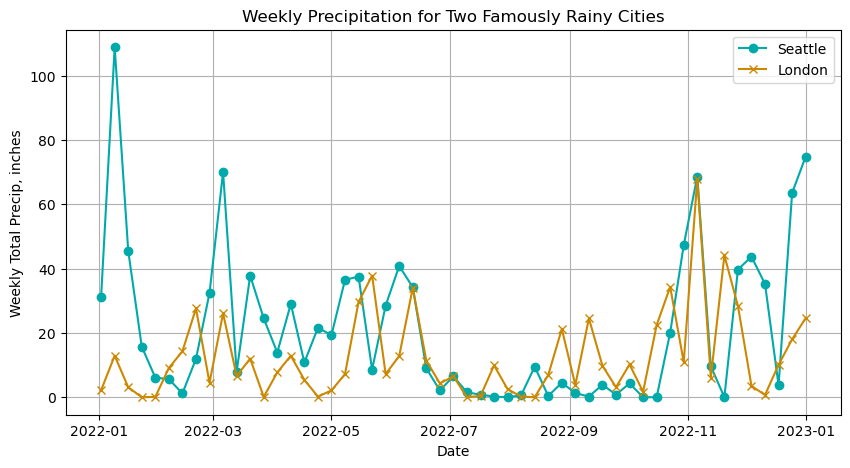

In [66]:
# Plot weekly rainfall for both cities 
# I'm assuming precip measurements are inches

plt.figure(figsize=(10,5))
plt.plot(both_weekly_precip.index,  both_weekly_precip['Seattle'], marker='o', color="#00aaaa")
plt.plot(both_weekly_precip.index,  both_weekly_precip['London'],  marker='x', color="#cc8800")
plt.title('Weekly Precipitation for Two Famously Rainy Cities')
plt.xlabel('Date')
plt.ylabel('Weekly Total Precip, inches')
plt.grid(True)
plt.legend(['Seattle', 'London'])
plt.show()


# comments on plot
Seattle has a huge amount of rain in January. Is that every year? We're looking at only 2022.

Both cities have rain on and off in varying amounts until July, when both go dry.  London start raining again in September while Seattle waits until Novemeber before seeing rain.  

The data for both cities zig-zags quite a bit. Perhaps a weekly sampling isn't the best choice. A longer binning period might reduce that noise, at the cost of lower resolution of starts and stops of rainy spells.  If rain naturally tends to fall more or less on, suppose, a nine day cycle, or a five day cycle, we would see aliasing effects.  OTOH, rain could really be falling  Now I'm getting curious...

(365,)
<class 'numpy.ndarray'> complex128 (365,) [ 662.8         +0.j           79.07524246 +68.24439667j
  -48.51060938+165.11232591j  -83.65815603 -69.85159278j
 -157.18177402 +34.69099065j   90.29897015 -54.84923031j]


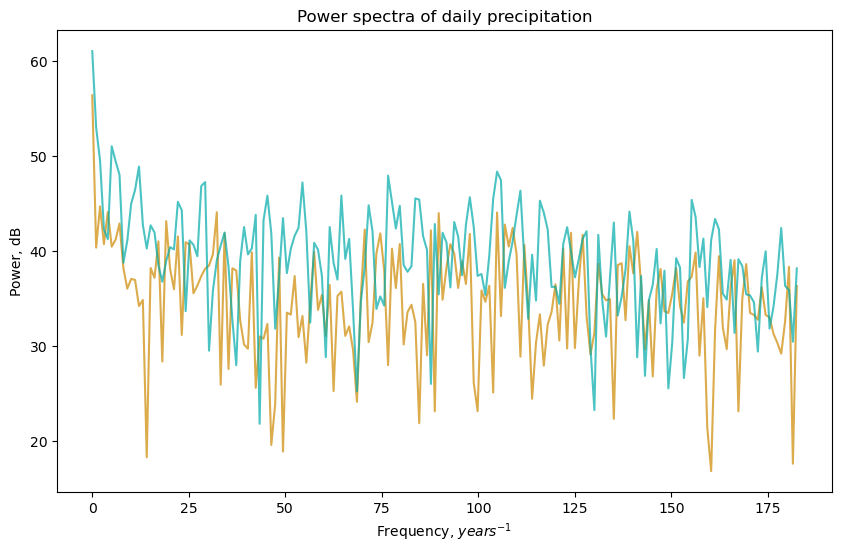

In [67]:
# Look at Fourier transform of hourly precip data. 
# Are there, by any chance, periodicities of a few days, half a week to two weeks? 
# Or any other notable peaks would be interesting.

daily_seattle_precip = np.array( seattle_df['precipitation'].resample('d').sum() ) 
daily_london_precip = np.array( london_df['precipitation'].resample('d').sum() )
print(daily_seattle_precip.shape)

fft_london = np.fft.fft( daily_london_precip )
fft_seattle = np.fft.fft( daily_seattle_precip )
print(  type(fft_london), fft_london.dtype,  fft_london.shape,  fft_london[:6] )


# Compute power in dB
london_power = 10 * np.log10( np.real( fft_london * fft_london.conj() )) 
seattle_power = 10 * np.log10( np.real( fft_seattle * fft_seattle.conj() ))

# Power spectra duplicate the data as a mirror image. Take just first half
n = london_power.shape[0]

london_power = london_power[:n//2]
seattle_power = seattle_power[:n//2]

freq = np.linspace(0, 365.0/2, num=london_power.size)
plt.figure(figsize=(10,6))
plt.plot(freq, london_power, color='#cc8800', alpha=0.7)
plt.plot(freq, seattle_power, color='#00aaaa', alpha=0.7)
plt.title("Power spectra of daily precipitation")
plt.xlabel("Frequency, $years^{-1}$")
plt.ylabel("Power, dB")

plt.show()

Inconclusive.  Very jagged, typical for this sort of data.  How to fix the awkward delta 25 along the bottom axis?  A peak at probably 12 cycles/year might be something, or just noise.  A better study would be to repeat this but average together several years to reduce randomness.

In [68]:
# Total rainfall for whole year - who is the winner for the most rain?
london_total_rain = daily_london_precip.sum()
seattle_total_rain = daily_seattle_precip.sum()

print("Total precip for 2022")
print("Seattle: ",  seattle_total_rain)
print("London: ",  london_total_rain)

Total precip for 2022
Seattle:  1131.1999999999998
London:  662.8


## Conclusion:  Seattle Is Rainiest!

Seattle has almost twice the annual precipitation of London, for the year 2022 which may or may not be a typical year.